<a href="https://it-omscholing.nl/locaties/hogeschool-rotterdam/">
<div>
<a><img src='../../pics/banner.PNG'/></a>
</div>
<div>
<a href=''><img src='../../pics/miw.PNG'/></a>
</div>
</a>

# Practicum Convolution Neural Nets (CNN) Deel 2

**Doel: Toepassen Convolutional Neural Networks**

### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torchvision.transforms.functional as F
import torchvision.transforms as T
from torchvision.io import ImageReadMode
from torchvision.io import read_image
from torch import nn
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

import torch
import random

<h3>Globale variabelen</h3>

In [2]:
forestDirectory = '../../pics/2750/Forest'
industrialDirectory = '../../pics/2750/Industrial'

### Context

<p>
Dit practicum bestaat uit twee onderdelen
<ol>
    <li>Het toepassen van een convolutie en pooling filter</li>
    <li><b>Het bouwen en trainen van een eenvoudig convolutional neural net dat een industrieterrein van een bos kan onderscheiden.</b></li>
</ol>    
Voor beide oefeningen gebruiken we de EuroSAT_RGB dataset
</p>

<img src='../../pics/eurosat_cnn.png' length=65% width=65%>

<h3>Data Collection</h3>
<p>
We gebruiken Images uit de <a href="https://github.com/phelber/EuroSAT">EuroSat dataset</a> die gemaakt zijn met de Sentinel-2 sateliet. Elke image is een 64x64 pixels foto van Europees aardoppervlak op een hoogte van 10 meter. De images zijn te categoriseren in Highway, Industrial, Pasture, PermanentCrop, Residential, River en SeaLake.
</p>
<img src=../../pics/eurosat_overview_small.jpg length=40% width=40%>
<p>
Download <a href="http://madm.dfki.de/files/sentinel/EuroSAT.zip">EuroSAT.zip</a> en kopieer daaruit de directory 2750 naar opdrachten/practica/pics.      
<strong>Voeg het pad naar de directory 2750 toe aan .gitignore zodat je de plaatjes niet naar je remote git repository pusht</strong>
</p>    

## Opdrachten

### Opdracht 3: pooling uitvoeren

Met PyTorch Functional kunnen we ook een pooling filter toepassen.

In [3]:
# Eerst de afbeeldingen weer inladen
industrial = torchvision.io.read_image(f'{industrialDirectory}/Industrial_1.jpg', ImageReadMode.GRAY).float()

i=random.randint(0,2500)
forest = torchvision.io.read_image(f'{forestDirectory}/Forest_{i}.jpg', ImageReadMode.GRAY).float()

forest1 = torchvision.io.read_image(f'{forestDirectory}/Forest_1.jpg', ImageReadMode.GRAY).float()


print(industrial.shape)
print(forest.shape)

torch.Size([1, 64, 64])
torch.Size([1, 64, 64])


In [4]:
# a. Bekijk de pooling opties en kies de juiste avg-variant
# https://pytorch.org/docs/stable/nn.functional.html
# https://pytorch.org/docs/stable/generated/torch.nn.functional.avg_pool2d.html#torch.nn.functional.avg_pool2d

# b. Pas pooling toe op de afbeelding 'Industrial_1.jpg':

#    - Kies een 3x3 kernel en een stride van 1
industrialPooled = torch.nn.functional.avg_pool2d(industrial, kernel_size=3, stride=1)
print(industrialPooled.shape)

# c. Herhaal de bovenstaande stappen voor een willekeure Forest Image
forestPooled = torch.nn.functional.avg_pool2d(forest, kernel_size=3, stride=1)
print(forestPooled.shape)

torch.Size([1, 62, 62])
torch.Size([1, 62, 62])


In [ ]:
# alternatief: er is ook torch.nn.AvgPool2d maar met andere parameters en dan werkt bovenstaande code niet.

### Reflectie

Komt de visuele uitkomst overeen met je verwachtingen?

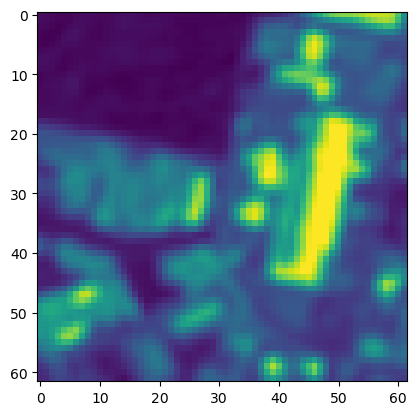

In [5]:
plt.imshow(industrialPooled.permute(1, 2, 0));

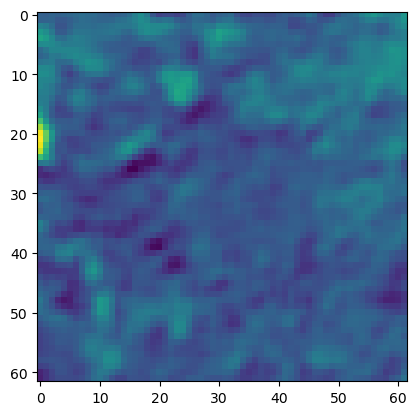

In [6]:
plt.imshow(forestPooled.permute(1, 2, 0));

In [ ]:
# Extra: varieer de stride en de kernel

### Reflectie

Wat is de invloed van padding en stride op de uitkomst?

### Opdracht 4: convolutie en pooling combineren

Een convolutional neural net combineert afwisselend convolutie en pooling in de eerste lagen.

We kunnen nu het effect van deze combinatie onderzoeken:

- Convolutie
- Pooling

In [7]:
# a. Bedenk en maak zelf een 2d convolution filter
# met 2,0,-2 maak je er een Sobel kernel van
edgeFilter3 = torch.Tensor(
        [
            [1, 0, -1], 
            [3, 0, -3], 
            [1, 0, -1]
        ]
).unsqueeze(0).unsqueeze(0)


In [8]:
# b. Bedenk en maak zelf een 2d pooling filter
industrialPooled5 = torch.nn.functional.avg_pool2d(industrial, kernel_size=5, stride=2)
print(industrialPooled5.shape)

forestPooled5 = torch.nn.functional.avg_pool2d(forest1, kernel_size=5, stride=2)
print(industrialPooled5.shape)

torch.Size([1, 30, 30])
torch.Size([1, 30, 30])


In [9]:
# c. Pas nu de convolutie toe op 'Industrial_1.jpg'
edgeFilter3.requires_grad = True

edgeConv3 = torch.nn.Conv2d(1, 1, kernel_size=3, stride=1, padding=0) 

with torch.no_grad():
    edgeConv3.weight = nn.Parameter(edgeFilter3)
    
industrialFiltered3 = edgeConv3(industrial)
forestFiltered3 = edgeConv3(forest1)


In [48]:
# alternatief: gebruik torch.nn.functional.conv2d
# geeft een foutmelding want verwacht andere parameters

# Wat is het verschil tussen nn.Method() en nn.functional.method() ???

# torch.nn.Conv2d: je maakt een klasse aan en doet daar nog niets mee

# torch.nn.functional.conv2d is een functie en daar doe je meteen iets mee


In [10]:
# d. Pas vervolgens een pooling toe op de uitkomst van c.
industrialPooled5 = torch.nn.functional.avg_pool2d(industrialFiltered3, kernel_size=5, stride=2)
print(industrialPooled5.shape)

forestPooled5 = torch.nn.functional.avg_pool2d(forestFiltered3, kernel_size=5, stride=2)
print(industrialPooled5.shape)

torch.Size([1, 29, 29])
torch.Size([1, 29, 29])


In [11]:
# e. Doe hetzelfde voor de afbeelding 'Forest_1.jpg'
# zie boven

In [12]:
# Function for plotting the images
def plotImgs(lImg, rImg):
    plt.style.use('dark_background') 
    plt.rcParams["font.size"] = 10
    plt.rcParams["figure.figsize"] = (10, 7)

    fig, (axL, axR) = plt.subplots(ncols=2, constrained_layout=True)
    
    imL = axL.imshow(np.squeeze(lImg))
    imR = axR.imshow(np.squeeze(rImg))

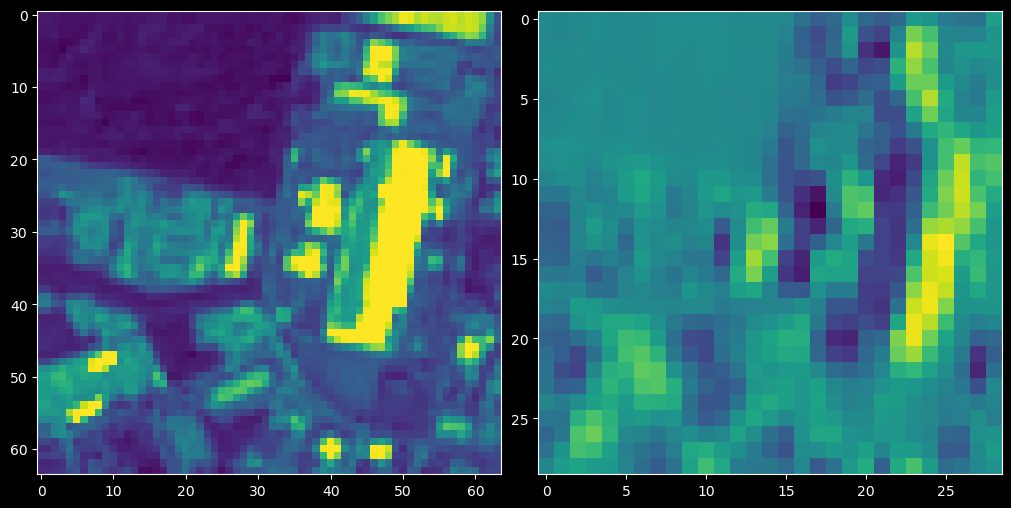

In [13]:
# Squeeze and detach to plot image.
industrialPooled5_1 = torch.Tensor.detach(industrialPooled5)
plotImgs(industrial, industrialPooled5_1)

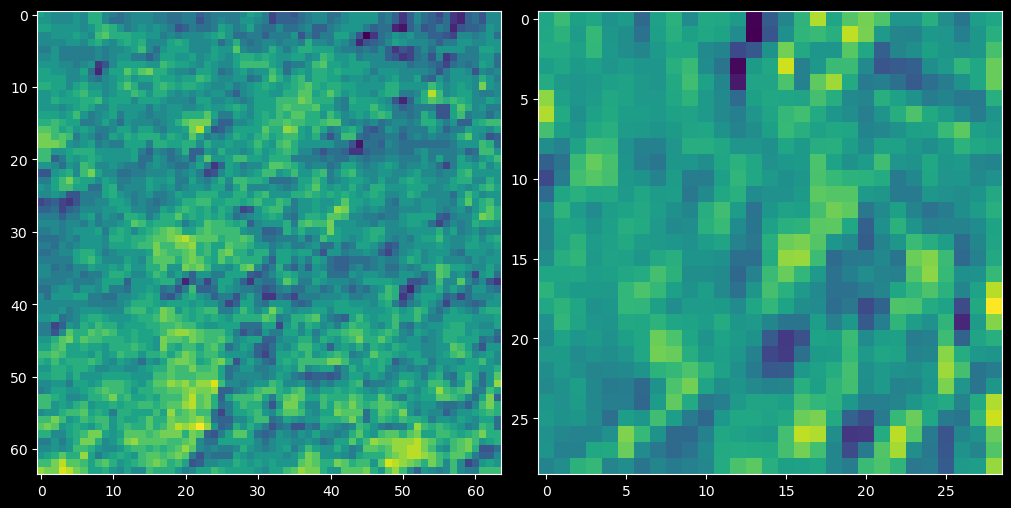

In [19]:
# Squeeze and detach to plot image.
forestPooled5_1 = torch.Tensor.detach(forestPooled5)
plotImgs(forest, forestPooled5_1)

### Reflectie

- Verschilt de uitkomst veel van de combinatie veel met convolutie en pooling?
- En zijn de afbeeldingen 'Industrial_1.jpg' en 'Forrest_1.jpg' beter te onderscheiden?

In [14]:
# Extra: bereid de combinatie uit met nog een extra convolutie en pooling laag

industrialFiltered3_2 = edgeConv3(industrialPooled5)
forestFiltered3_2 = edgeConv3(forestPooled5)

industrialPooled5_2 = torch.nn.functional.avg_pool2d(industrialFiltered3_2, kernel_size=5, stride=2)
print(industrialPooled5_2.shape)

forestPooled5_2 = torch.nn.functional.avg_pool2d(forestFiltered3_2, kernel_size=5, stride=2)
print(industrialPooled5_2.shape)

torch.Size([1, 12, 12])
torch.Size([1, 12, 12])


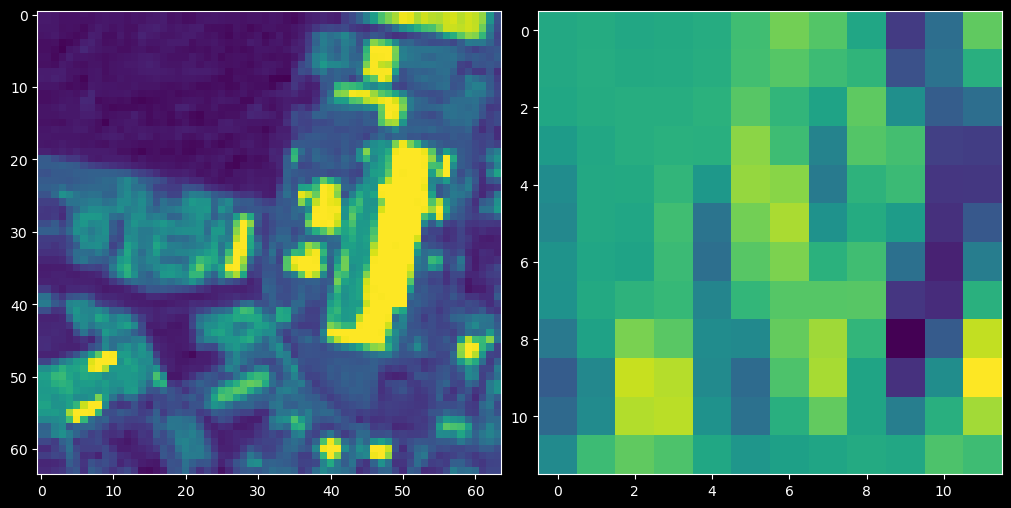

In [15]:
industrialPooled5_2 = torch.Tensor.detach(industrialPooled5_2)
plotImgs(industrial, industrialPooled5_2)

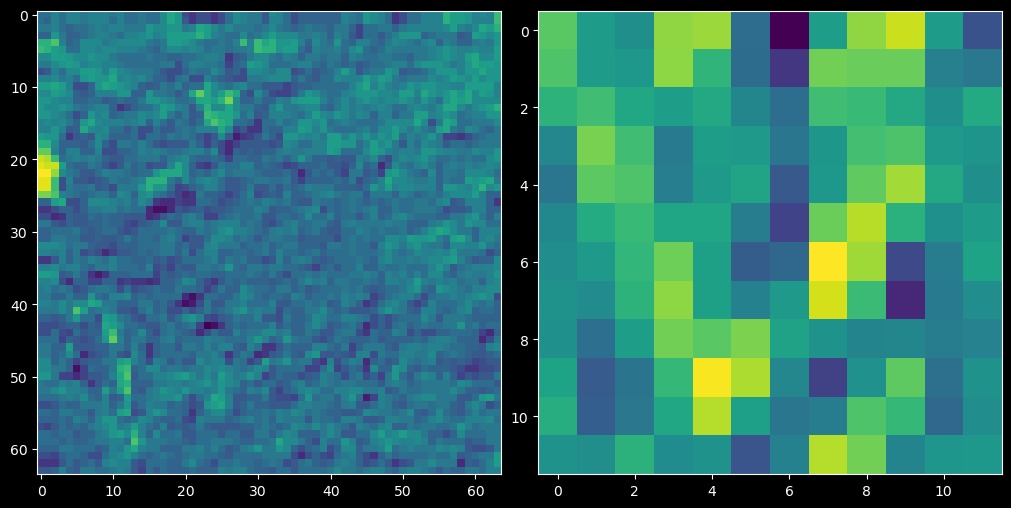

In [16]:
forestPooled5_2 = torch.Tensor.detach(forestPooled5_2)
plotImgs(forest, forestPooled5_2)

### Reflectie

Heeft een extra laag veel invloed op de onderscheidbaarheid van de afbeeldingen?

### Opdracht 5: dataset prepareren

Om het neurale netwerk te trainen moeten we de dataset opsplitsen in labels (Y, de categoriën) en input afbeeldingen (X).

In [ ]:
# a. Denk nog eens terug aan hoe we kruisjes van rondjes van elkaar konden onderscheiden

#    - Hoe representeerden we de labels? 
# output, klasses 0 en 1

#    - Hoe representeerden we de kruisjes en de rondjes? 
# input, features

#    - Hoe combineerden we dit tot een dataset? 
# lijst van inputs en lijst van outputs

# b. Hoe kunnen we de labels 'Industrial' en 'Forest' dus representeren?
# Industrial -> 0
# Forest -> 1



In [ ]:
# c. Vorm nu een dataset voor 'Industrial' en 'Forest'


In [17]:
import os

In [54]:
listOfFileNames = []
outputLabels = []

for filename in os.listdir(industrialDirectory):
    imgFile = os.path.join(industrialDirectory, filename)

    if ".jpg" in imgFile:
        listOfFileNames.append(imgFile)
        outputLabels.append([0,1])
        
for filename in os.listdir(forestDirectory):
    imgFile = os.path.join(forestDirectory, filename)

    if ".jpg" in imgFile:
        listOfFileNames.append(imgFile)
        outputLabels.append([1,0])
        

In [55]:
display(len(listOfFileNames))

display(len(outputLabels))

display(type(outputLabels[0]))

5500

5500

list

In [57]:
imageTensors = [ plt.imread(pic).astype(float) for pic in listOfFileNames ]
nrOfImages = len(imageTensors)

type(imageTensors)
outputLabelsArray = np.asarray(outputLabels)


full_dataset = []
for i in range(len(imageTensors)):
   full_dataset.append([imageTensors[i], outputLabelsArray[i]])

trainloader = torch.utils.data.DataLoader(full_dataset, shuffle=True, batch_size=100)
i1, l1 = next(iter(trainloader))
print(i1.shape)
# imageTensors.shape




torch.Size([100, 64, 64, 3])


In [59]:
# train_size = int(0.8 * len(full_dataset))
# test_size = len(full_dataset) - train_size
# train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])

train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])

trainloader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=100)
i1, l1 = next(iter(trainloader))
print(i1.shape)
# imageTensors.shape

testloader = torch.utils.data.DataLoader(test_dataset, shuffle=True, batch_size=100)
i1, l1 = next(iter(trainloader))
print(i1.shape)
# imageTensors.shape


torch.Size([100, 64, 64, 3])
torch.Size([100, 64, 64, 3])


In [ ]:
# aantal experimenten op andere manier namelijk met utils.data.Tensordataset

In [31]:
imageTensors = torch.Tensor([ plt.imread(pic).astype(float) for pic in listOfFileNames ])
nrOfImages = len(imageTensors)

type(imageTensors)
imageTensors.shape

torch.Size([5500, 64, 64, 3])

In [41]:
imageTensors = torch.Tensor ([ (read_image(pic, mode=ImageReadMode.GRAY).float()) for pic in listOfFileNames ])
#nrOfImages = len(imageTensors)

type(imageTensor[0])

type(outputLabels[0])


ValueError: only one element tensors can be converted to Python scalars

In [21]:
display(nrOfImages)

5500

In [34]:

# d. Extra: implementeer bovenstaande via een Dataset en DataLoader class
#           (zie https://pytorch.org/docs/stable/data.html voor verdere details)

import torch.utils.data as data_utils

# dataset = data_utils.TensorDataset(train_feat, train_labels)
# train_loader = data_utils.DataLoader(dataset, batch_size=7, shuffle=True)

dataset = data_utils.TensorDataset(imageTensors, outputLabels)
# train_loader = data_utils.DataLoader(dataset, batch_size=7, shuffle=True)


AttributeError: 'list' object has no attribute 'size'

### Opdracht 6: CNN ontwerpen

We kunnen een convolutional neural net opbouwen met convolutie, pooling en fully connected lagen. Hieronder definiëren we een topologie om een afbeeldingen van 32 x 32 te onderscheiden.

De topologie is gebaseerd op de blog post 'A simple CNN with Pytorch'. Dus zie het artikel voor extra details.

In [22]:
#-------------------------------------------------------

class CNN(nn.Module):
    
    #-------------------------------------------------------
    
    # Hier worden de klasses aangemaakt en dus uit nn en niet uit nn.functional
    def __init__(self):
        
        # Because we inherit from Module base class
        super().__init__()
        
        # RGB input, 6 filters, kernel of 5 x 5
        # met 3 input kanalen en 6 output kanalen (zelf gekozen) en een kernel van 5 (dat is 3,5,5)
        # 6 varianten zijn geen kleuren meer maar feature maps met C,H,W = 6x60x60 want 65-5+1 (-kernel size +1)
        self.conv1 = nn.Conv2d(3, 6, 5)
        
        # Filter is 2 x 2 with a stride of 2 (defined once, used two times)
        # met grootte van 2 en stride van 2 dus je halveert 
        self.pool = nn.MaxPool2d(2, 2)
        
        # in_channels = 6 because self.conv1 output has 6 channels
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        # Hieronder begint de classificatie:
        # Fully connected layer matched on output of conv2 layer
        # self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc1 = nn.Linear(16 * 13 * 13, 120) # waarbij 120 zelf gekozen
        
        # Fully connected layer
        self.fc2 = nn.Linear(120, 84) # waarbij 120 gelijk aan de vorige laag en 84 zelf gekozen
        
        # We only have 2 labels
        self.fc3 = nn.Linear(84, 2) # warbij 84 gelijk aan de vorige laag en 2 je label klasses 0 en 1 zijn.
        
        # let op dat je 13 x 13 die erin gaat meer zegt dan je origineel van 64 x 64 omdat je er eigenschappen uit gefilterd hebt die iets zeggen
        
        # merk op dat het in alle lagen fully connected kan maar dat is heel veel rekenwerk en ws niet zo nauwkeurig
        
    #-------------------------------------------------------
    # Hier worden de klasses aangeroepen met x = C * H * W = 3,64,64    
    def forward(self, x):
        
        # Convolution with relu layers
        # van binnen naar buiten doe je convolutie, relu en pooling 
       
        x = self.pool(F.relu(self.conv1(x)))
         # na conv is het 6,60,60
        # na pooling is het 6,30,30
        
        x = self.pool(F.relu(self.conv2(x)))
        # na conv is het 16,26,26
        # na pooling 16,13,13 en dit is de representatie gemaakt door je encoder
        
        # vanaf hier is het fully connected en dit deel is je classifier:
        
        # To match the output of the conv2 layer onto the first fully connected layer
        # Like reshape() but makes no copy (reuses underlaying data)
        # x = x.view(-1, 16 * 5 * 5)
        x = x.view(-1, 16 * 13 * 13)
        
        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        
        # No activation on final layer 
        return self.fc3(x) # geeft de ruwe activatie (2 getallen) en dat kan je in een % uitdrukken dmv softmax: die geeft twee getallen tussen 0 en 1 en die samen 1 geven. Gebruik BCE Loss: BinaryCrossEntropy() met als result bijvoorbeeld 0.7 voor 0 en 0.3 voor 1 

#-------------------------------------------------------

### Opdracht 7: CNN trainen

Het trainen van een CNN is identiek aan het trainen van een fully connected (a.k.a. dense) netwerk.

# a. Ga voor jezelf na welke stappen een typisch trainingsproces bevat

- data prepareren en invoeren (dataset en dataloader)
- forward propagation
- evaluate: compare outcome with labels
- calculate loss and use it for back propagation (adjusting the weights)
- forward propagation etc.
- number of epochs until finsihed

Then:
- test with test data


# b. Bekijk de blog post 'A simple CNN in Python' en zet de training op

# c. Het voorbeeld bevat geen validatie tijdens de trainingsstap (epoch)

#    - Bekijk het Notebook met de de postcode FastScan
#      en bereid de training uit met validatie in de trainingsloop

### Opdracht 8: dropout toevoegen

Om het netwerk effectiever te trainen wordt dropout toegepast.

PyTorch maakt het toevoegen van dropout makkelijk.

In [ ]:
# a. Bekijk het artikel Using Dropout Regularization in PyTorch Models (zie sources)

# b. Pas nu dropout toe op een hidden layer van je model

# c. Hertrain je model

#    - Let er op dat je je model evalueert in eval() mode
#    - Heeft de dropout invloed op de accuracy van je model?

### Reflectie

- Wat gebeurt er als de dropout groot is (bijvoobeeld 0.9)?

### Bronnen

[EuroSAT project](https://github.com/phelber/eurosat)

[Pytorch Neural Nets](https://pytorch.org/docs/stable/nn.html)

[Kernels](https://en.wikipedia.org/wiki/Kernel_(image_processing))

[A simple CNN with Pytorch](https://tomroth.com.au/pytorch-cnn)

[A guide to convolution arithmetic for deep learning](https://arxiv.org/pdf/1603.07285.pdf)

[Using Dropout Regularization in PyTorch Models](https://machinelearningmastery.com/using-dropout-regularization-in-pytorch-models)